In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
total_df = pd.read_csv("../data/train.csv")
total_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
total_df["item"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [4]:
total_df["store"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

**This shows that there are 50 different items in 10 different stores ranging from item 1 to item 50**

## Preprocessing: Splitting the "date" column into useful information

In [5]:
total_df["year"] = total_df["date"].apply(lambda x: int(x.split("-")[0]))

In [6]:
total_df["month"] = total_df["date"].apply(lambda x: int(x.split("-")[1]))
total_df["day"] = total_df["date"].apply(lambda x: int(x.split("-")[2]))

In [7]:
total_df.head()

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


In [8]:
store_1 = total_df[total_df["store"] == 1]

In [9]:
store_1

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5
...,...,...,...,...,...,...,...
896561,2017-12-27,1,50,38,2017,12,27
896562,2017-12-28,1,50,52,2017,12,28
896563,2017-12-29,1,50,59,2017,12,29
896564,2017-12-30,1,50,66,2017,12,30


In [10]:
store_1["store"].unique()

array([1])

In [11]:
store_1_item_1 = store_1[store_1["item"] == 1]

In [12]:
store_1_item_1.head()

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3
3,2013-01-04,1,1,13,2013,1,4
4,2013-01-05,1,1,10,2013,1,5


## Visualization: Plotting the sales value for (store_1, item_1) to check seasonality of data

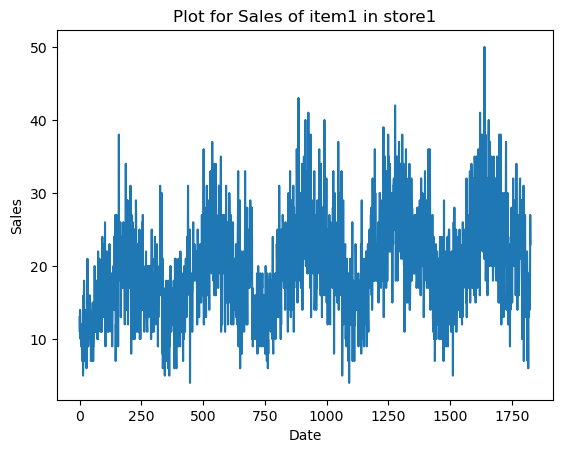

In [13]:
plt.plot(store_1_item_1["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Plot for Sales of item1 in store1")
plt.show()

**The plot indicates that the data is a time-series data as well as a periodic data. The fact that it is time-series, we can use ARIMA model and the seasonal property indicates that SARIMA model can be used.**

**Also we see that the data represents a stationary time-series data. We will also formally check the stationarity using Augmented Dickey-Fuller (ADF) test.**

## Visualization: Plotting trend in (store_1, item_1) sales in 1 year time frame

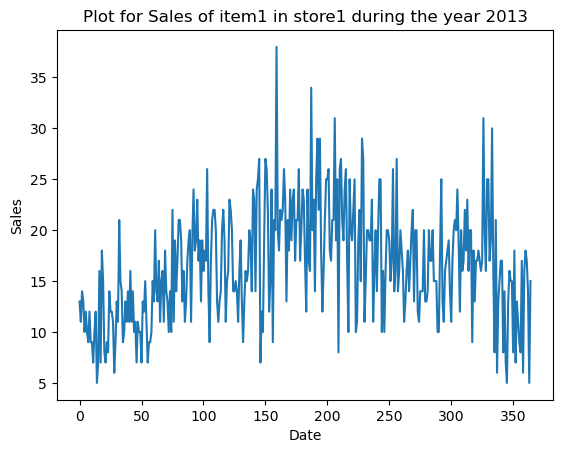

In [28]:
plot_record = store_1_item_1.iloc[:365]
plt.plot(plot_record["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Plot for Sales of item1 in store1 during the year 2013")
plt.show()

## Visualization: Plotting trend in (store_1, item_1) sales in 1 month time frame

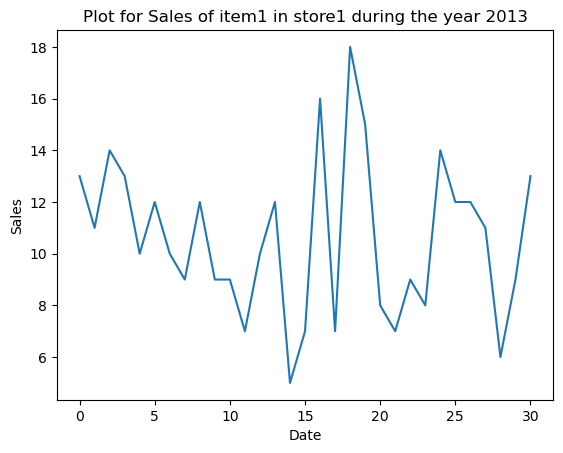

In [30]:
plot_record = store_1_item_1.iloc[:31]
plt.plot(plot_record["sales"])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Plot for Sales of item1 in store1 during the year 2013")
plt.show()

## Visualization: Autocorrelation Plot

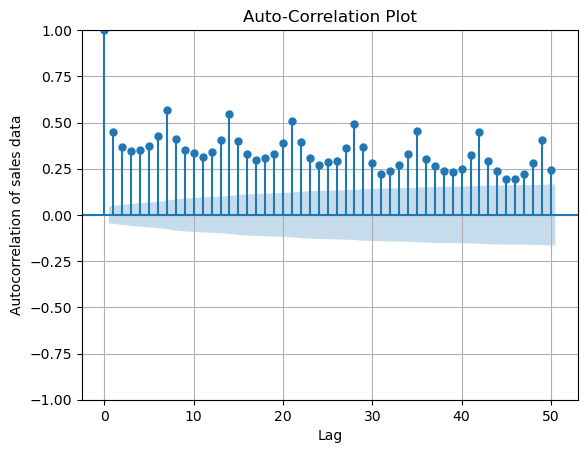

In [36]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(store_1_item_1["sales"], lags=50)
plt.title("Auto-Correlation Plot")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation of sales data")
plt.grid(True)
plt.show()

## Visualization: Box Plot for Sales Distribution

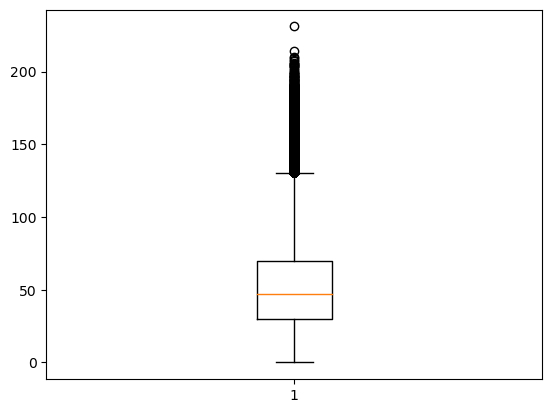

In [24]:
plt.boxplot(total_df["sales"])
plt.show()

**Even though we see datapoints for sales data lying above the 1.5*IQR margin, these datapoints lead to the periodicity and flactuation in a time-series data**

## Visualization: Sales records visualized using boxplot, grouped by year

In [53]:
store_1_item_1_year_wise = store_1_item_1[["year", "sales"]]

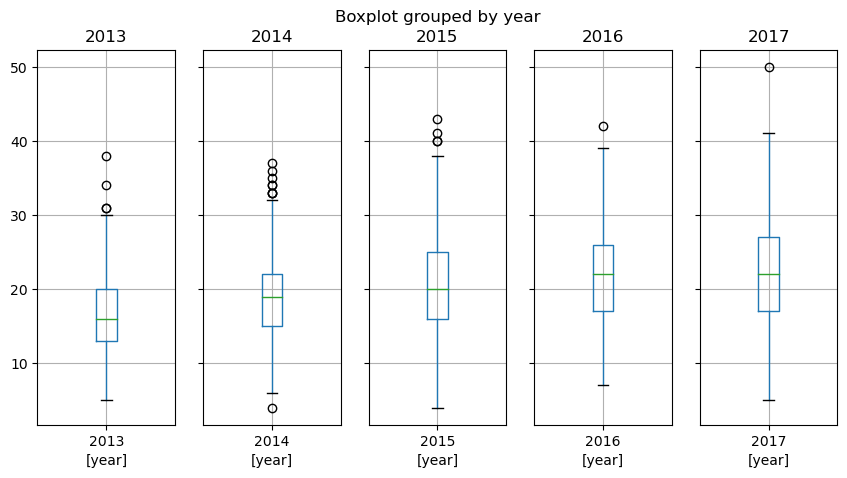

In [71]:
groups = store_1_item_1_year_wise.groupby(by='year')
groups.boxplot(by='year', subplots=True, layout=(1, 5), figsize=(10, 5))
plt.show()

## Augmented Dickey-Fuller Test for Stationarity in Time Series and its Hypothesis Testing 

In [26]:
total_df["date"] = pd.to_datetime(total_df["date"])
total_df.head(3)

,date,store,item,sales,year,month,day
0,2013-01-01,1,1,13,2013,1,1
1,2013-01-02,1,1,11,2013,1,2
2,2013-01-03,1,1,14,2013,1,3


In [22]:
from statsmodels.tsa.stattools import adfuller
x = store_1_item_1["sales"].values
result = adfuller(x)
print("p-value: ", result[1])

p-value:  0.022569380626571333


## Hypothesis testing with Level of Confidence as 0.05
Null Hypothesis, H0: The time series data has unit root => non-stationary

Alt Hypothesis, H1: The time series doesn't have a unit root => stationary

In [23]:
alpha = 0.05
if result[1] >= 0.05:
    print("Fail to reject null hypothesis => non-stationary data")
else:
    print("Rejecting null hypothesis => stationary data")

Rejecting null hypothesis => stationary data


### The time series is hence stationary!